In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


![](https://res.cloudinary.com/practicaldev/image/fetch/s--WNLJ9xLZ--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://thepracticaldev.s3.amazonaws.com/i/3soqhs8850b2h7klkqia.png)

In neural networks, Convolutional neural network (ConvNets or CNNs) is one of the main categories to perform image recognition, image classifications. Object detections, facial recognition etc.

In [2]:
# load the data
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# check the shape of the train and test
print("Train Shape :" , train.shape)
print("Test Shape  :", test.shape)

Train Shape : (42000, 785)
Test Shape  : (28000, 784)


In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's plot the frequecy chart for each digit in Training data

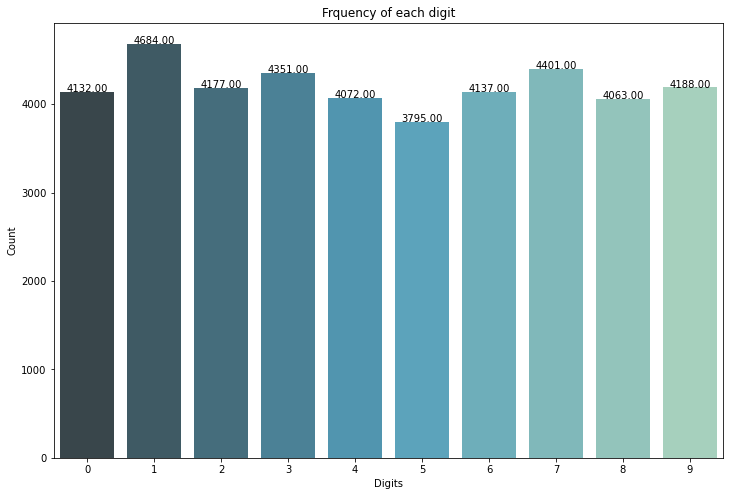

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import seaborn as sns
fig = plt.figure(figsize=(12,8))
ax = sns.countplot(x="label", palette="GnBu_d", data=train)
total = float(len(train))
plt.ylabel('Count')
plt.xlabel('Digits')
plt.title('Frquency of each digit')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 
show()


Split the data into train and test

In [7]:
X_train = train.drop('label',axis=1)
y_train = train['label']
X_train=X_train.values.reshape(-1,28,28,1)
y_train.values.reshape(-1,1)

X_test = test
X_test=X_test.values.reshape(-1,28,28,1)

In [8]:
# normalizing pixel values in range [0,1]
X_train = X_train/255
X_test = X_test/255

Plot random images with the labels

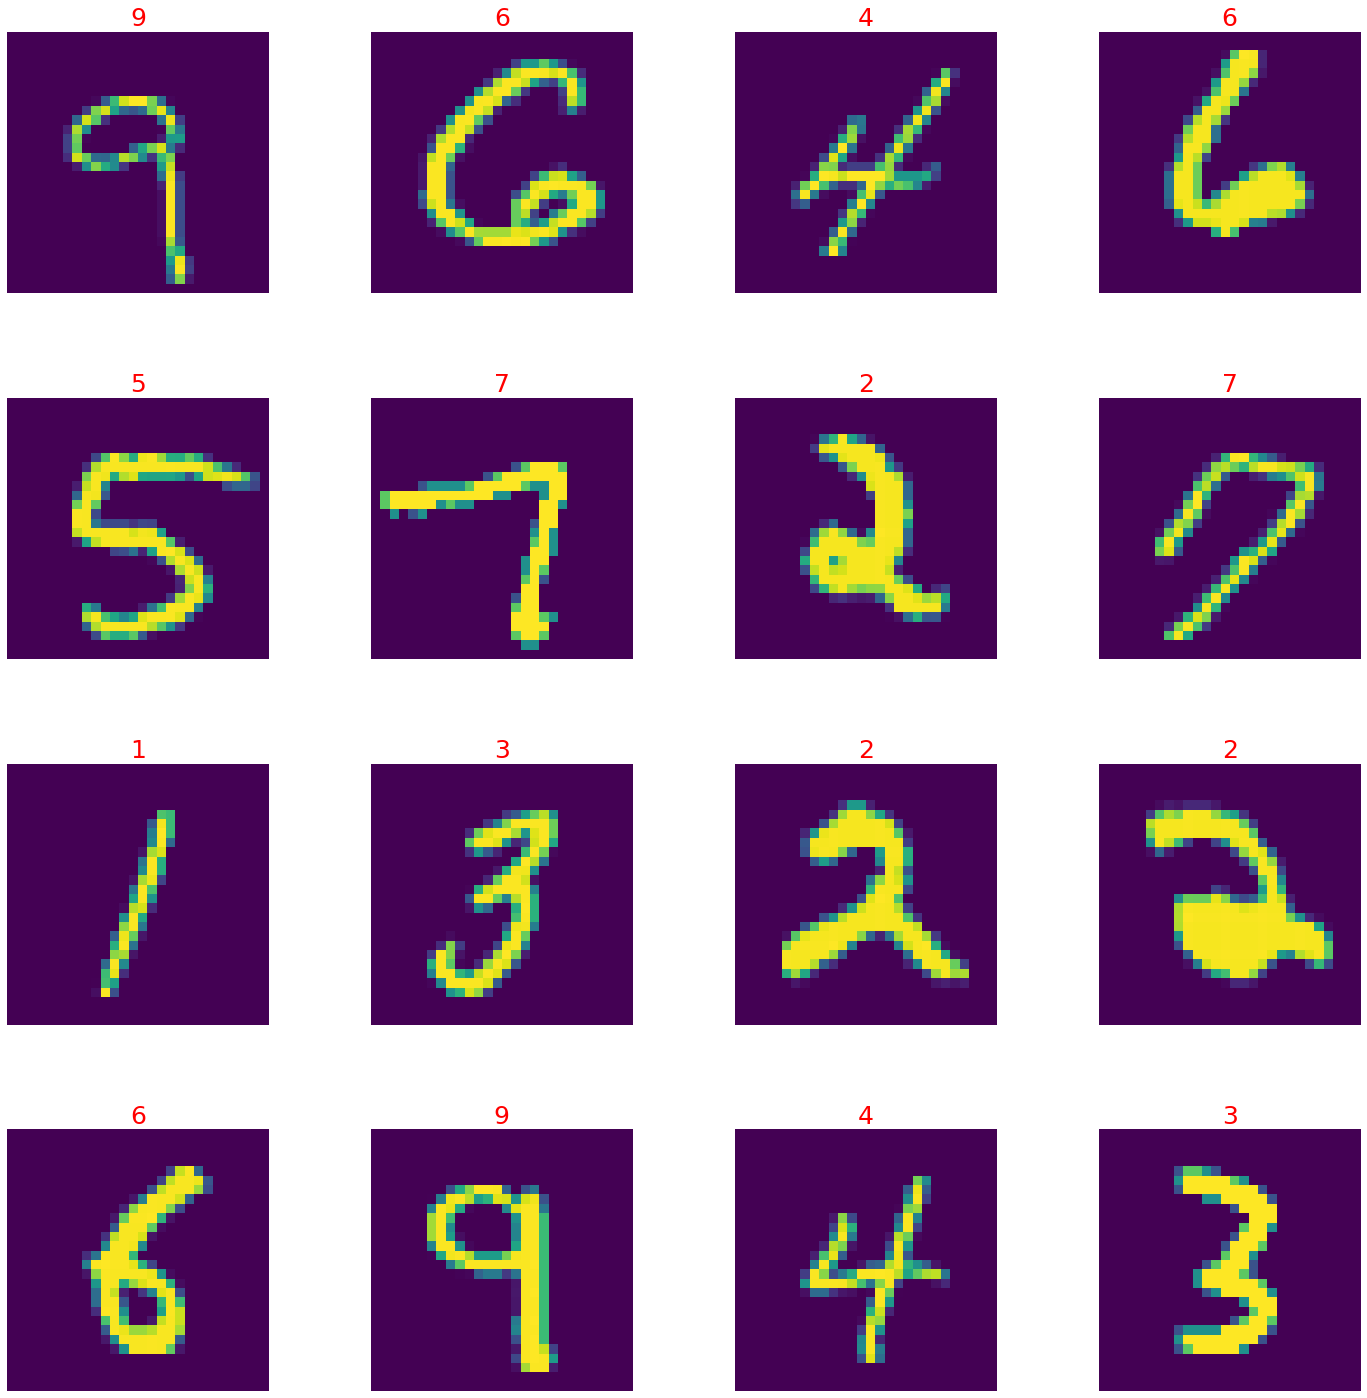

In [9]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index].reshape([28,28]))
    axes[i].set_title(y_train[index],fontsize=25, color='red')
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)


In [10]:
# initialize the input shape
Input_shape = X_train.shape[1:]

In [11]:
# load libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard,ReduceLROnPlateau

Using TensorFlow backend.


In [12]:
# build the model
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))


cnn_model.add(Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(AveragePooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [13]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 512)       590336    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 512)         2359808   
_________________________________________________________________
average_pooling2d (AveragePo (None, 4, 4, 512)         0

In [14]:
# compile the model
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [15]:
# fit the model with training data
hist = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 5, shuffle = True)

Epoch 1/5
1313/1313 [==============================] - 15s 12ms/step - loss: 0.2134 - accuracy: 0.9433
Epoch 2/5
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0827 - accuracy: 0.9810
Epoch 3/5
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0759 - accuracy: 0.9833
Epoch 4/5
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0764 - accuracy: 0.9836
Epoch 5/5
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0833 - accuracy: 0.9841


In [16]:
# check for the keys to plot
hist.history.keys()

dict_keys(['loss', 'accuracy'])

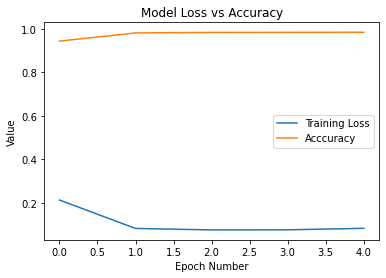

In [17]:
# plot the loss and accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('Model Loss vs Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Acccuracy'])

In [18]:
# predicted the labels 
predicted_classes = cnn_model.predict_classes(X_test) 
predicted_classes

array([2, 0, 9, ..., 3, 9, 2])

In [19]:
# create a submission copy
df_submission = pd.DataFrame([test.index+1,predicted_classes],["ImageId","Label"]).transpose()

In [20]:
# convert to CSV
df_submission.to_csv('digits_submission.csv',index=False)